# Fibonacci Series - Iterative & Recursive Implementation

**Recursive**

*   Input/Output: Input n as non-negative integer; output nth Fibonacci number as integer.

*   Time complexity: Best O(2^n), Average O(2^n), Worst O(2^n) due to repeated recomputation of subproblems.

*   Space usage:
O(n) for recursion depth.

*   Suitability/trade-offs: Simple to express but impractical for moderate n; hits recursion limits and explodes exponentially; use only for demonstration or very small n.


**Iterative**

*   Input/Output: Input n as non-negative integer; output nth Fibonacci number as integer.

*   Time complexity: Best O(n), Average O(n), Worst O(n) with linear pass.

*   Space usage: O(1) using rolling variables.

*   Suitability/trade-offs: Efficient and stable; ideal replacement for recursive version; trivial memory footprint with rolling variables.

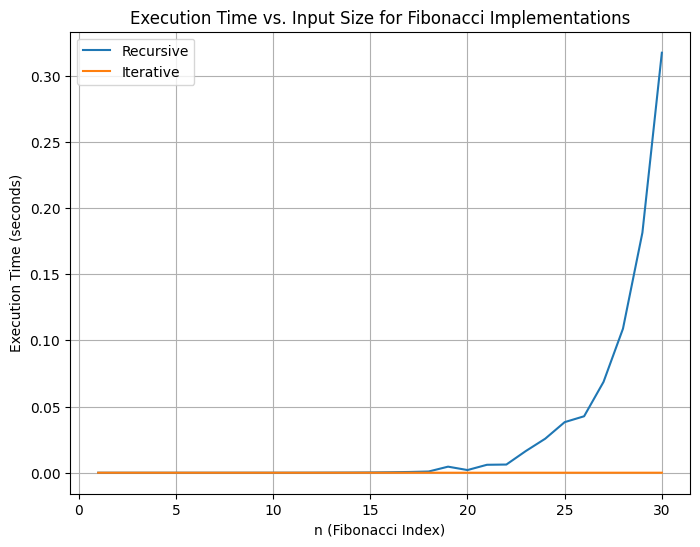

In [2]:
import matplotlib.pyplot as plt
import time

def fib_recursive(n):
    if n <= 1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)

def fib_iterative(n):
    a, b = 0, 1
    for i in range(n):
        a, b = b, a + b
    return a

ns = list(range(1, 31))
recursive_times = []
iterative_times = []

for n in ns:
    start = time.perf_counter()
    fib_recursive(n)
    recursive_times.append(time.perf_counter() - start)

    start = time.perf_counter()
    fib_iterative(n)
    iterative_times.append(time.perf_counter() - start)

plt.figure(figsize=(8,6))
plt.plot(ns, recursive_times, label='Recursive')
plt.plot(ns, iterative_times, label='Iterative')
plt.xlabel('n (Fibonacci Index)')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs. Input Size for Fibonacci Implementations')
plt.legend()
plt.grid(True)
plt.savefig('fib_impl.png', dpi=150, bbox_inches='tight')
plt.show()


# Sorting Algorithms

# Merge Sort



* Input/Output: Input list/array of comparable elements; output new sorted list/array.

* Time complexity: Best O(nlogn), Average O(nlogn), Worst O(nlogn).

* Space usage: O(n) auxiliary buffer for merging; recursion depth
O(logn).

* Suitability/trade-offs: Predictable performance and stable ordering; extra memory cost vs in-place algorithms; good for large datasets and when stability is required.



In [5]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])

    i = j = 0
    merged = []

    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1

    merged.extend(left[i:])
    merged.extend(right[j:])
    return merged

print(merge_sort([5,8,1,2,4]))

[1, 2, 4, 5, 8]


#Quick Sort

* Input/Output: Input list/array of comparable elements; output sorted list/array (or in-place variant).

* Time complexity: Best O(nlogn), Average O(nlogn), Worst
O(n^2) on ordered inputs with poor pivoting.

* Space usage: Average O(logn) stack depth; worst O(n); no extra array in in-place partitioning.

* Suitability/trade-offs: Often fastest in practice due to cache-friendly partitions and low constants; randomized/median-of-three pivots mitigate worst case; not stable by default.



In [6]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left  = [x for x in arr if x < pivot]
    mid   = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + mid + quick_sort(right)
print(quick_sort([6, 1, 2, 4, 9]))

[1, 2, 4, 6, 9]


#Bubble Sort

* Input/Output: Input list/array of comparable elements; output sorted list/array (in-place).

* Time complexity: Best O(n) with early-exit optimization, Average
O(n^2), Worst O(n^2).

* Space usage: O(1); stable.

* Suitability/trade-offs: Educational and simple but slow for large n; early-exit helps nearly sorted data; rarely used in production.



In [7]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

print(bubble_sort([4,7,1,3,9]))

[1, 3, 4, 7, 9]


#Selection Sort

* Input/Output: Input list/array of comparable elements; output sorted list/array (in-place).

* Time complexity: Best O(n^2), Average O(n^2), Worst O(n^2) regardless of input order.

* Space usage:
O(1); not stable in the basic implementation.

* Suitability/trade-offs: Predictable but slow; performs minimal swaps, which can be useful when writes are expensive; otherwise dominated by better algorithms.



In [8]:
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr
print(selection_sort([5,4,3,2,1]))

[1, 2, 3, 4, 5]


#Insertion Sort

* Input/Output: Input list/array of comparable elements; output sorted list/array (often in-place).

* Time complexity: Best O(n) on nearly sorted input, Average O(n^2), Worst O(n^2)

* Space usage: O(1) extra; stable.

* Suitability/trade-offs: Excellent for small n and nearly sorted data; used as a base case inside divide-and-conquer sorts; quadratic on random/large inputs.



In [10]:
def insertion_sort(arr):
    n = len(arr)
    for i in range(1, n):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

insertion_sort([5,1,2,4,3])

[1, 2, 3, 4, 5]

#Comparison and Plotting of Sorting Algorithms (Execution Time vs. Array Size)

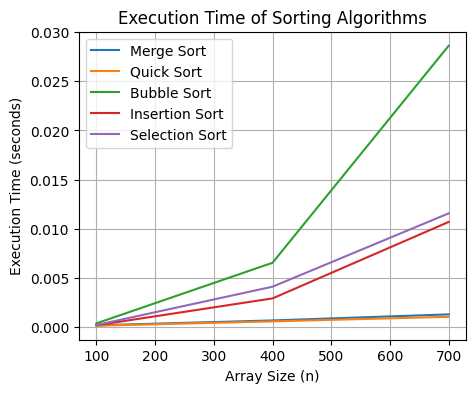

In [11]:
import matplotlib.pyplot as plt
import time
import random


ns = list(range(100, 1000, 300))
merge_sort_times = []
quick_sort_times = []
bubble_sort_times = []
insertion_sort_times = []
selection_sort_times = []

for n in ns:
    arr = random.sample(range(n*10), n)  # Create random array of size n

     # Time Merge Sort
    arr_copy = arr.copy()
    start = time.perf_counter()
    merge_sort(arr_copy)
    merge_sort_times.append(time.perf_counter() - start)

    # Time selection sort
    arr_copy = arr.copy()
    start = time.perf_counter()
    quick_sort(arr_copy)
    quick_sort_times.append(time.perf_counter() - start)

    # Time bubble sort
    arr_copy = arr.copy()
    start = time.perf_counter()
    bubble_sort(arr_copy)
    bubble_sort_times.append(time.perf_counter() - start)

    # Time insertion sort
    arr_copy = arr.copy()
    start = time.perf_counter()
    insertion_sort(arr_copy)
    insertion_sort_times.append(time.perf_counter() - start)

    # Time selection sort
    arr_copy = arr.copy()
    start = time.perf_counter()
    selection_sort(arr_copy)
    selection_sort_times.append(time.perf_counter() - start)

plt.figure(figsize=(5,4))
plt.plot(ns, merge_sort_times, label='Merge Sort')
plt.plot(ns, quick_sort_times, label='Quick Sort')
plt.plot(ns, bubble_sort_times, label='Bubble Sort')
plt.plot(ns, insertion_sort_times, label='Insertion Sort')
plt.plot(ns, selection_sort_times, label='Selection Sort')
plt.xlabel('Array Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time of Sorting Algorithms')
plt.legend()
plt.grid(True)
plt.savefig('sort_algos.png', dpi=150, bbox_inches='tight')
plt.show()

#Binary Search

* Input/Output: Input sorted list/array and target value; output index if found, else sentinel (e.g., -1).

* Time complexity: Best O(1) if mid matches immediately, Average O(logn), Worst O(logn).

* Space usage: Iterative O(1); recursive O(logn) due to call stack.

* Suitability/trade-offs: Extremely efficient lookup on sorted data; requires prior sorting or maintained order; iterative form avoids recursion overhead.



In [12]:
def binary_search(arr, target):
    lo, hi = 0, len(arr) - 1
    while lo <= hi:
        mid = (lo + hi) // 2
        if arr[mid] == target:
            return mid
        if arr[mid] < target:
            lo = mid + 1
        else:
            hi = mid - 1
    return -1

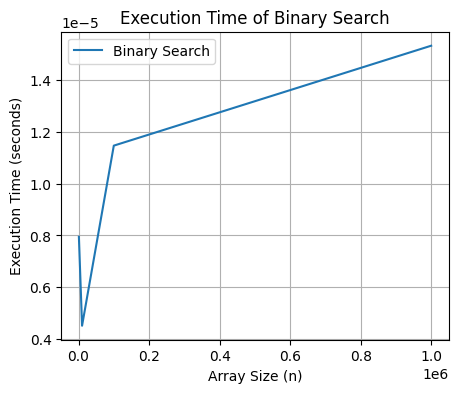

In [13]:
ns = [10**k for k in range(3, 7)]
binary_search_times = []

for n in ns:
    arr = list(range(n))
    target = n - 1
    start = time.perf_counter()
    _ = binary_search(arr, target)
    binary_search_times.append(time.perf_counter() - start)

plt.figure(figsize=(5,4))
plt.plot(ns, binary_search_times, label='Binary Search')
plt.xlabel('Array Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time of Binary Search')
plt.legend()
plt.grid(True)
plt.savefig('search_impl.png', dpi=150, bbox_inches='tight')
plt.show()